**Description**: This Project Will Predict the open price of a company name Amazon using a Long Short Term memory using a Neural network


In [0]:
#importing a require library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [0]:
#get stock data
df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941


In [0]:
df.shape

(2003, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


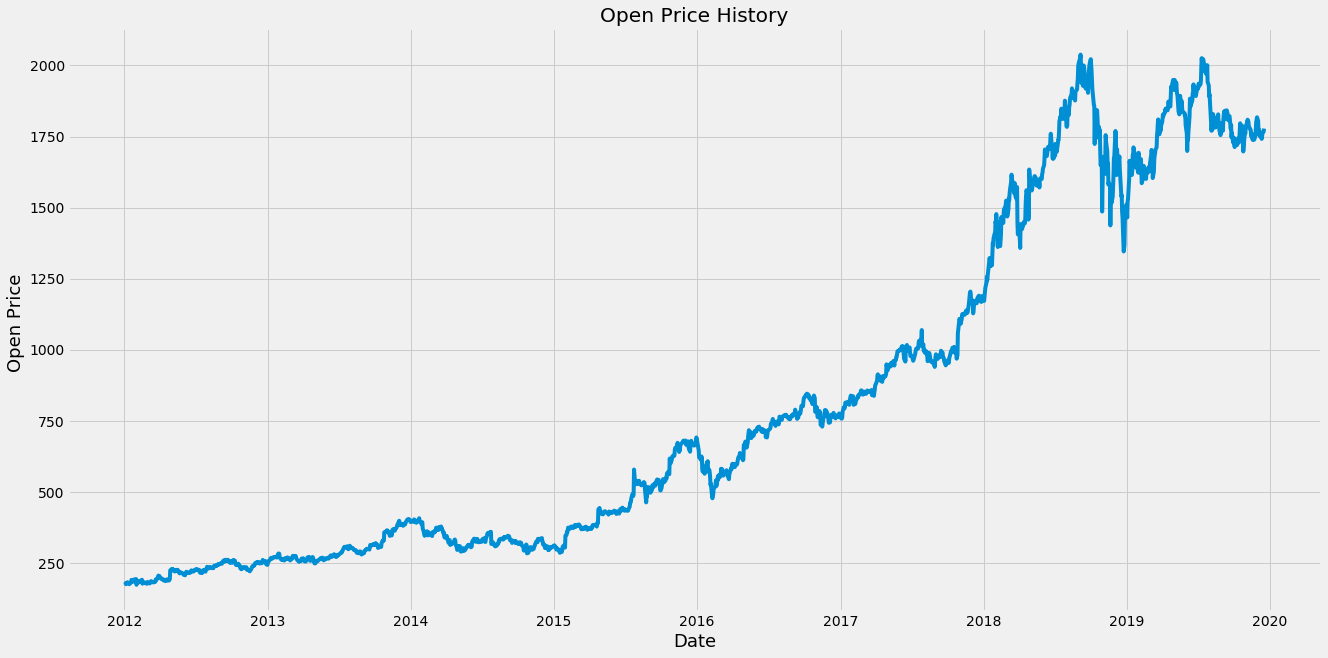

In [0]:
plt.figure(figsize=(20,10))
plt.title("Open Price History")
plt.plot(df['Open'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Open Price ",fontsize=18)
plt.show()


In [0]:
#create a new dataframe with only 'open Column'
data=df.filter(['Open'])
#converting into numpy
dataset=data.values
#Get number of rows to train the model
data_len=math.ceil(len(dataset)*.8)
data_len

1603

In [0]:
#Scale a data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0011157 ],
       [0.00289653],
       [0.00114252],
       ...,
       [0.85350534],
       [0.85457813],
       [0.86048384]])

In [0]:
#Create A tranning dataset
#Create the scaled tranning dataset
train_data=scaled_data[0:data_len,:]
#split the data in x and y train dataset
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()   



[array([0.0011157 , 0.00289653, 0.00114252, 0.00228505, 0.00480073,
       0.00391032, 0.00312718, 0.00300917, 0.00107279, 0.00340074,
       0.00436089, 0.00915626, 0.00906507, 0.00910797, 0.00600225,
       0.00706968, 0.00830875, 0.01034168, 0.01065815, 0.0108298 ,
       0.        , 0.00313254, 0.00483828, 0.00668884, 0.00474172,
       0.00597543, 0.00573406, 0.00515475, 0.00716623, 0.00926353,
       0.00937617, 0.00213485, 0.00336856, 0.00474172, 0.00436625,
       0.00312718, 0.00315936, 0.00200075, 0.00273025, 0.00540686,
       0.00326128, 0.00304136, 0.00278389, 0.00261224, 0.00474172,
       0.00555705, 0.0069624 , 0.00553559, 0.00542295, 0.00527812,
       0.0044038 , 0.00507966, 0.00517084, 0.00593789, 0.01002521,
       0.00897388, 0.00976238, 0.01216006, 0.01597382, 0.01734163])]
[0.014734753741656781]

[array([0.0011157 , 0.00289653, 0.00114252, 0.00228505, 0.00480073,
       0.00391032, 0.00312718, 0.00300917, 0.00107279, 0.00340074,
       0.00436089, 0.00915626, 0.0

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape The Data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:


#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



Epoch 1/1
1543/1543 [==============================] - 112s 72ms/step - loss: 1.7694e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2000
test_data=scaled_data[data_len-60:,:]
#Create x_test,y_test
x_test=[]
y_test=[dataset[data_len:,:]]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1 ))

In [0]:
# Get th model predicted the price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [0]:
#Geting the root mean square error (RMSE)
rmse=np.sqrt(np.mean(predictions- y_test)**2)
rmse

2.851382141113281

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


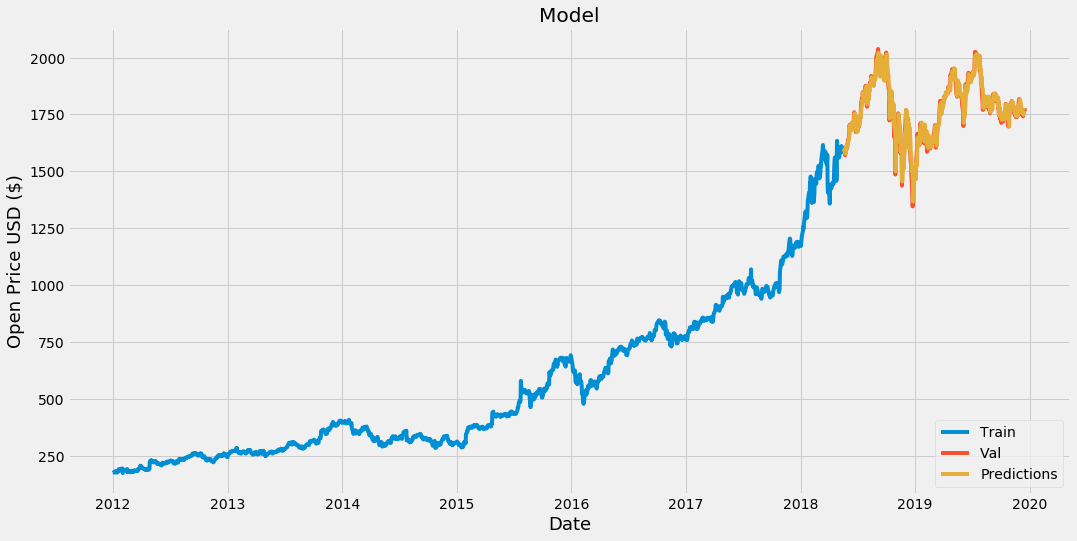

In [0]:
#Plot the data
train = data[:data_len]
valid = data[data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

,Open,Predictions
Date,,
2018-05-17,1580.560059,1586.983765
2018-05-18,1581.329956,1590.307251
2018-05-21,1585.000000,1589.187256
2018-05-22,1589.890015,1593.515503
2018-05-23,1571.050049,1597.208008
...,...,...
2019-12-11,1741.670044,1754.320068
2019-12-12,1750.000000,1748.996582
2019-12-13,1765.000000,1758.118042


In [0]:
#Get the Quote
amzn_qoute=df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Creat the new dataframe
new_df=amzn_qoute.filter(['Open'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1782.0781]]


In [0]:
amzn_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2012-12-12', end='2012-12-12')
print(amzn_quote2['Open'])

Date
2012-12-12    251.070007
Name: Open, dtype: float64
